In [12]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [13]:
stations_centract_df = pd.read_csv('../Data/stations_census_tracts.csv')
stations_centract_df = stations_centract_df.rename(columns={'Station #': 'station_id'})
stations_centract_df["tractce10"]= stations_centract_df["tractce10"].astype(str)

for i in range(len(stations_centract_df)):
    if len(stations_centract_df.loc[i]['tractce10']) == 5:
        stations_centract_df.at[i, 'tractce10'] = '0' + stations_centract_df.loc[i]['tractce10']
        
stations_centract_df = stations_centract_df.drop(columns=['Station_Name'])

In [14]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    try:
        geometry = [Point(xy) for xy in zip(station_df.Longitude, station_df.Latitude)]
        crs = 4326
        station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    except:
        print("unable to convert to geodf")
        station_gdf = None
    return station_gdf

In [15]:
def station_df(list_df, filenames=['nyc_stations.csv']):
    filtered_gdf = []
    count = 0
    
    #for every df in the list of df sent in
    for df in list_df:
        #rename all of the columns to get rid of spaces
        df = df.rename(columns={'Trip id': 'Tripid', 'From station id': 'start_station_id',
                               'From station name': 'start_station_name', 'To station id': 
                               'end_station_id', 'To station name': 'end_station_name'})

        
        
        #address any NaN values in station id field
        for row, col in df.iterrows():
            if pd.isna(df.loc[row]['start_station_id']):
                df.at[row,'start_station_id'] = 0
            if pd.isna(df.loc[row]['end_station_id']):
                df.at[row,'end_station_id'] = 0

        df['start_station_id'] = df.start_station_id.astype(int)
        df['end_station_id'] = df.start_station_id.astype(int)

        ##filter for start station locations
        stations_df = df.drop_duplicates(subset='start_station_id')
        stations_df = stations_df.reset_index()
        stations_df = stations_df.drop(columns=['index', 'Tripid', 'Starttime', 'Stoptime', 'Bikeid',
                                                      'Tripduration','Usertype', 'end_station_id', 'end_station_name'])
        stations_df = stations_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'Station_Name'})

        # ## filter for end station locations
        end_stations_df = df.drop_duplicates(subset='end_station_id')
        end_stations_df = end_stations_df.reset_index()
        end_stations_df = end_stations_df.drop(columns=['index', 'Tripid', 'Starttime', 'Stoptime', 'Bikeid',
                                                      'Tripduration','Usertype', 'start_station_id', 'start_station_name'])
        end_stations_df = end_stations_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'Station_Name'})

        # #concat the two dataframes together and drop duplicates once more
        combo_stations_df = pd.concat([stations_df, end_stations_df])
        combo_stations_df = combo_stations_df.drop_duplicates(subset='station_id')
        combo_stations_df = combo_stations_df.reset_index()
        combo_stations_df = combo_stations_df.drop(columns=['index'])

        final_stations_df = combo_stations_df.merge(stations_centract_df, on='station_id')

        #save the data frame
        try:
            final_stations_df.to_csv('../Data/PGH/stations/'+filenames[count])
        except:
            print('Cannot convert dataframe to csv.')
        
        filtered_gdf.append(geoify_df(final_stations_df))
        print(filenames[count])
        count += 1
        
    return filtered_gdf

In [16]:
#set path to access all json files in January folder
data_dir = Path('../Data') / 'TripData'
data_files = data_dir.glob('*.csv')

list_df = []
filenames = []

for file in data_files:
    print(file)
    df = pd.read_csv(file, low_memory=False)
    list_df.append(df)
    filepath = str(file).split('/')
    filename = filepath[3]
    filenames.append(filename)
    
filtered_df = station_df(list_df, filenames)

../Data/TripData/trip_data_2016Q4.csv
../Data/TripData/trip_data_2016Q1.csv
../Data/TripData/trip_data_2016Q3.csv
../Data/TripData/trip_data_2016Q2.csv
../Data/TripData/trip_data_2017Q4.csv
../Data/TripData/trip_data_2015Q4.csv
../Data/TripData/trip_data_2017Q3.csv
../Data/TripData/trip_data_2017Q2.csv
../Data/TripData/trip_data_2015Q2.csv
../Data/TripData/trip_data_2015Q3.csv
../Data/TripData/trip_data_2017Q1.csv
../Data/TripData/trip_data_2019Q3.csv
../Data/TripData/trip_data_2019Q2.csv
../Data/TripData/trip_data_2020Q4.csv
../Data/TripData/trip_data_2019Q1.csv
../Data/TripData/trip_data_2020Q1.csv
../Data/TripData/trip_data_2019Q4.csv
../Data/TripData/trip_data_2020Q2.csv
../Data/TripData/trip_data_2020Q3.csv
../Data/TripData/trip_data_2018Q1.csv
../Data/TripData/trip_data_2018Q3.csv
../Data/TripData/trip_data_2018Q2.csv
../Data/TripData/trip_data_2018Q4.csv
trip_data_2016Q4.csv
trip_data_2016Q1.csv
trip_data_2016Q3.csv
trip_data_2016Q2.csv
trip_data_2017Q4.csv
trip_data_2015Q4.csv


In [17]:
#get the 2010 census tracts in Pittsburgh
cenTract = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts-shp/2010_Census_Tracts.shp')

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/geopandas/plotting.py:589: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



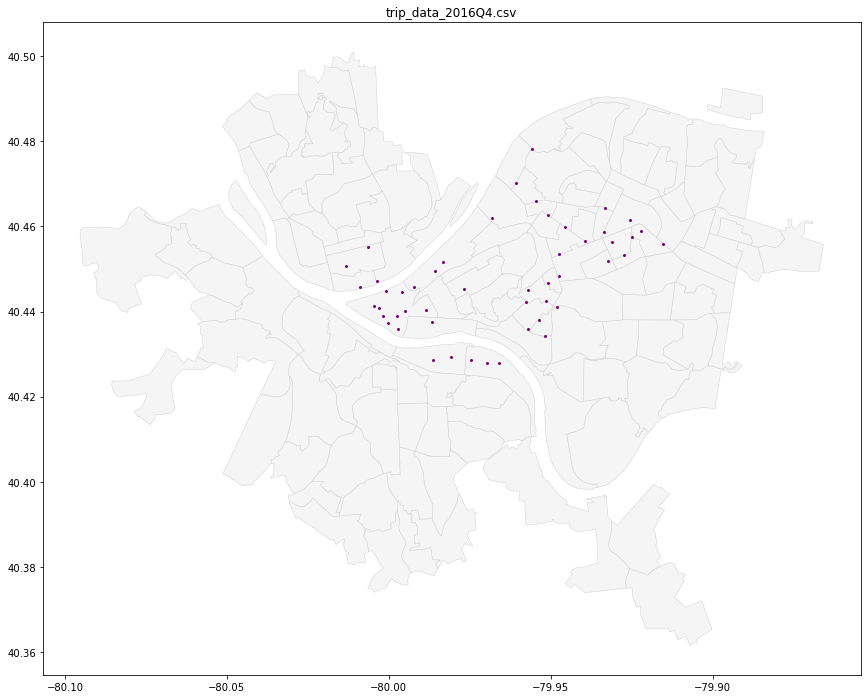

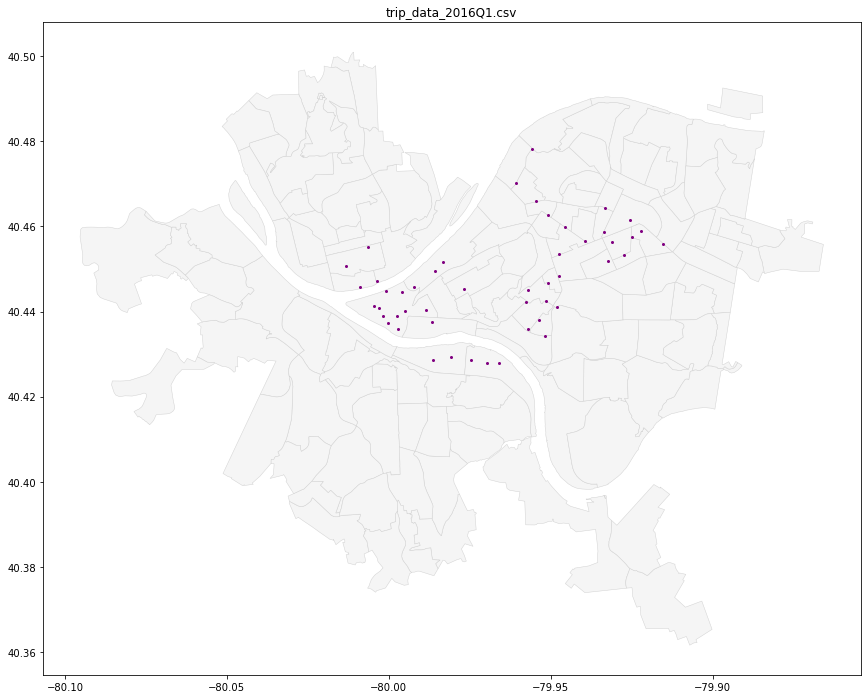

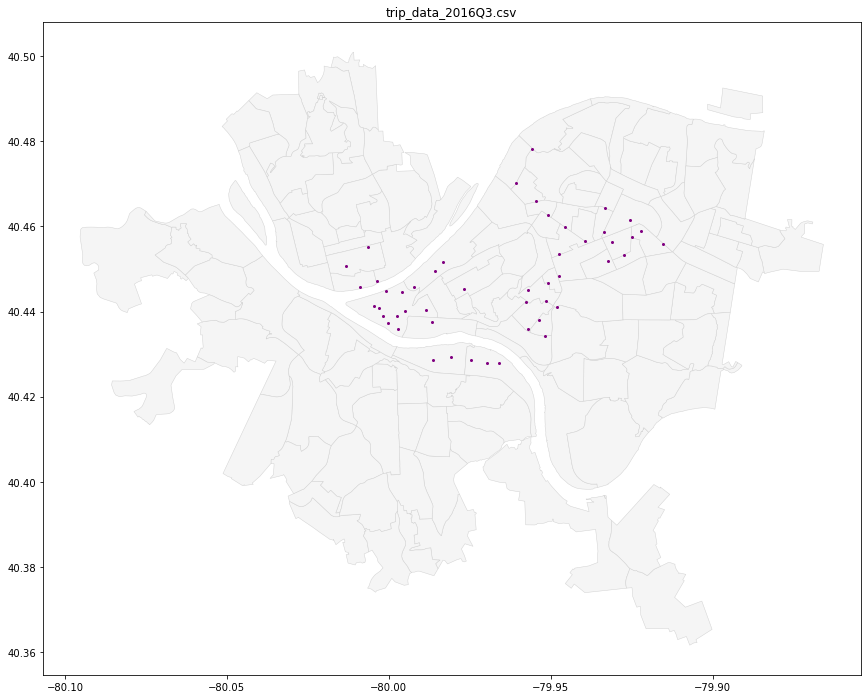

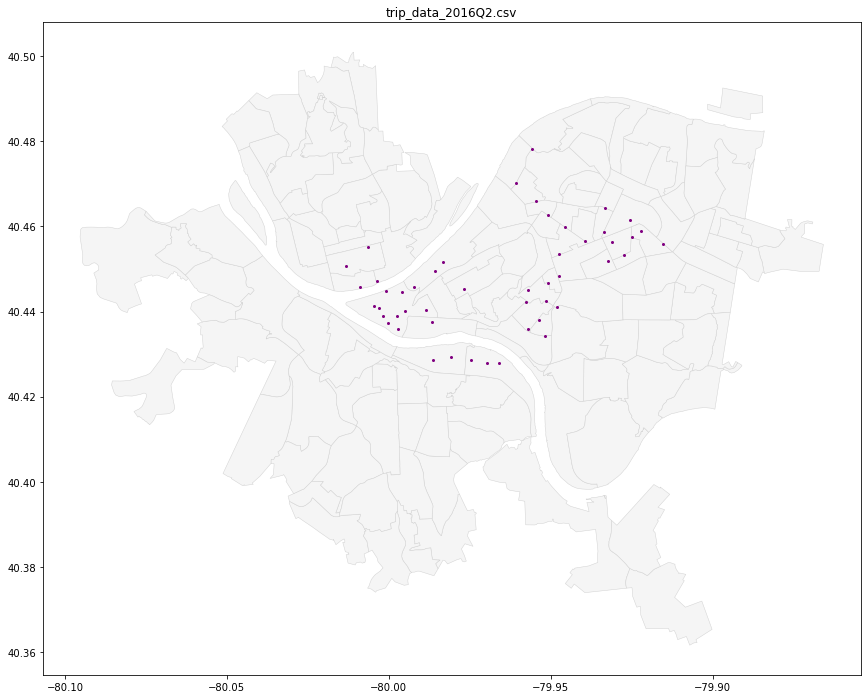

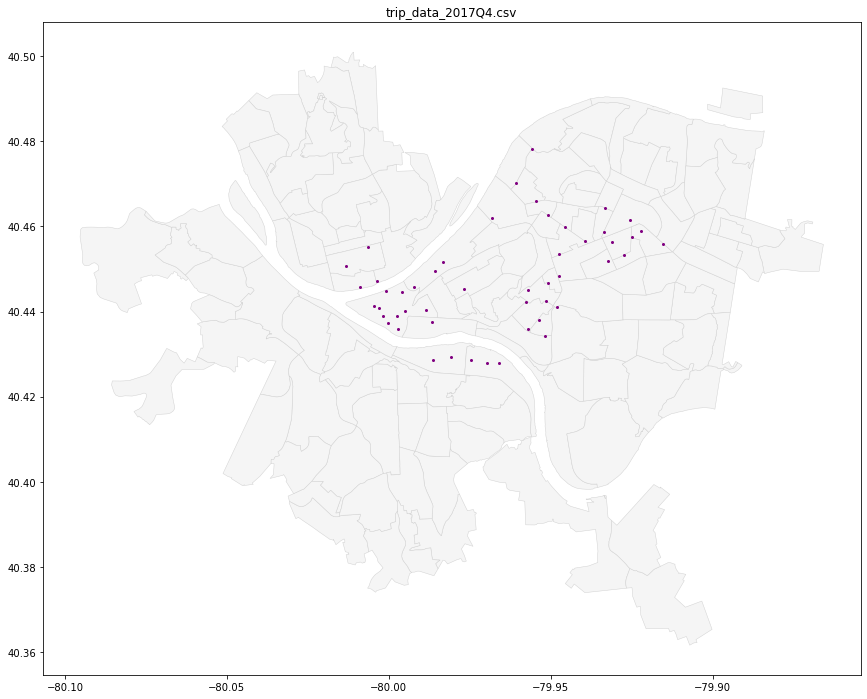

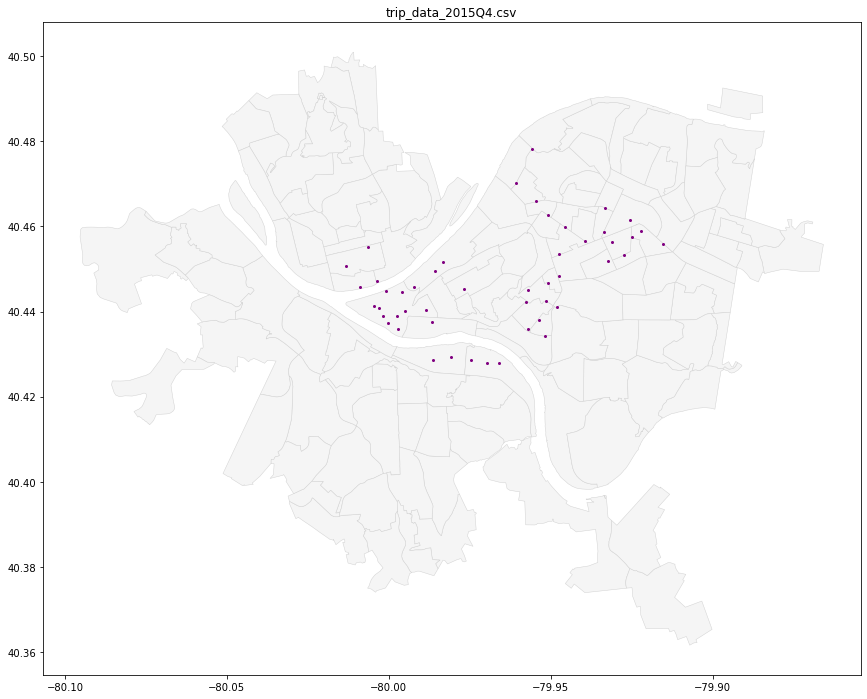

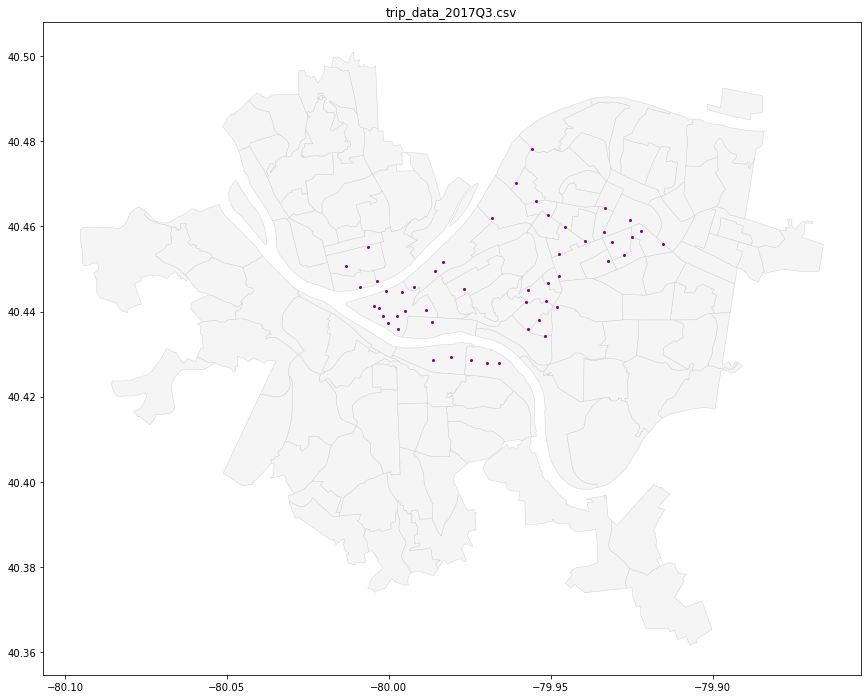

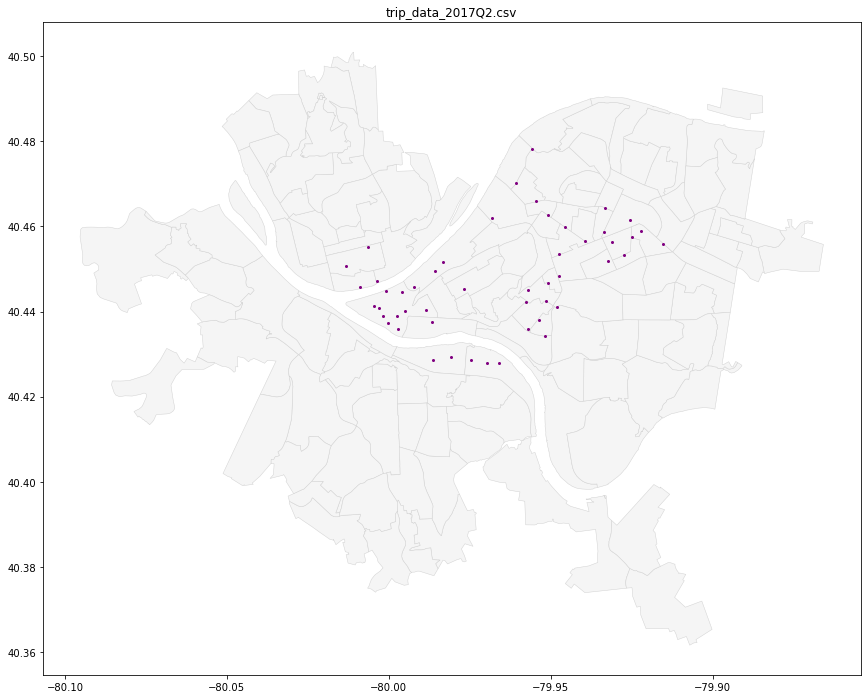

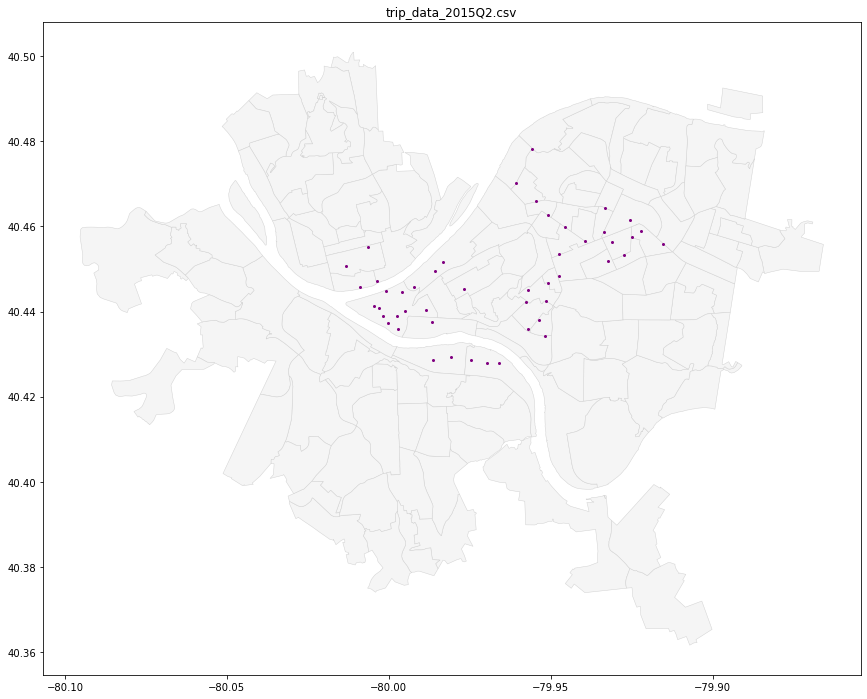

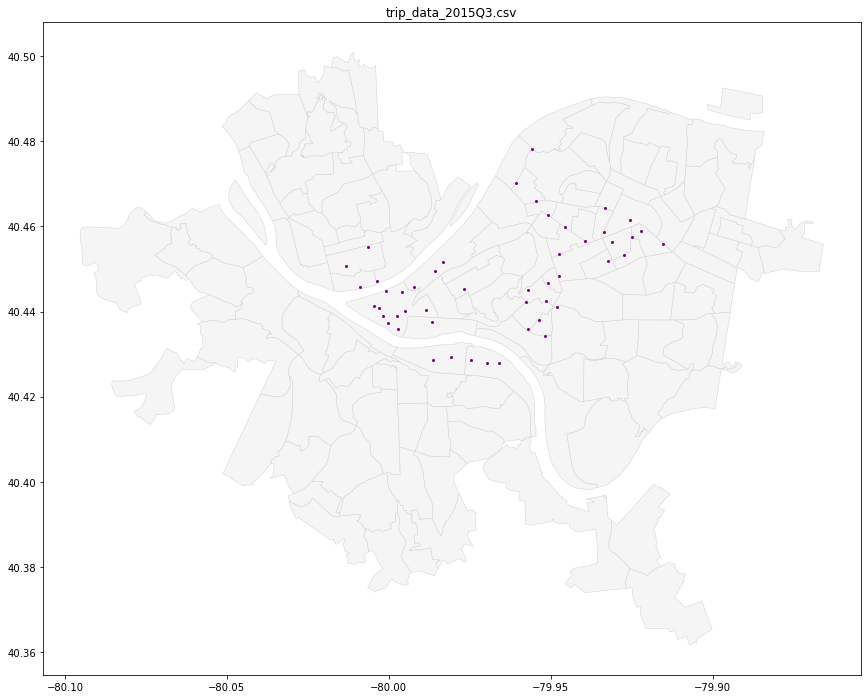

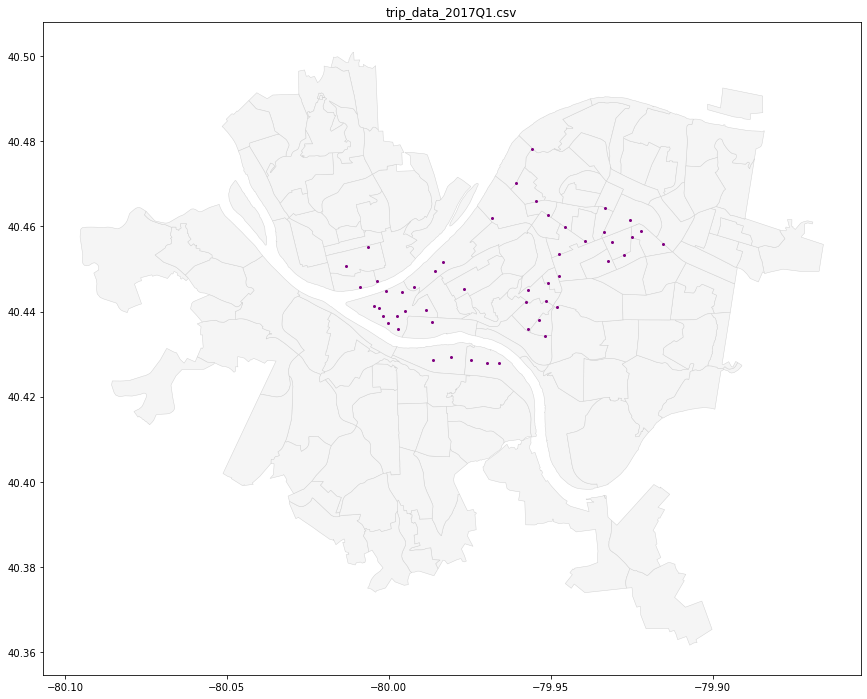

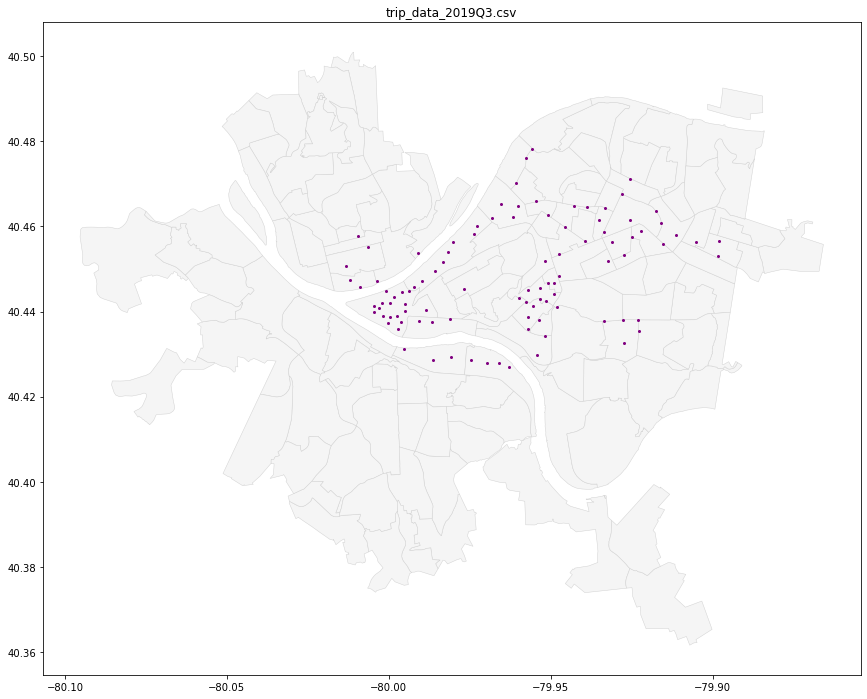

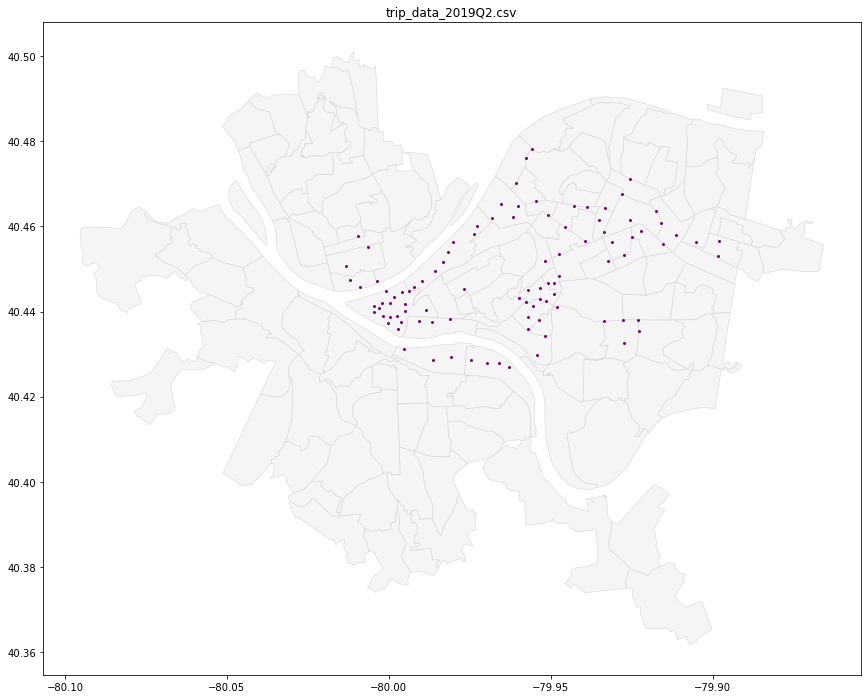

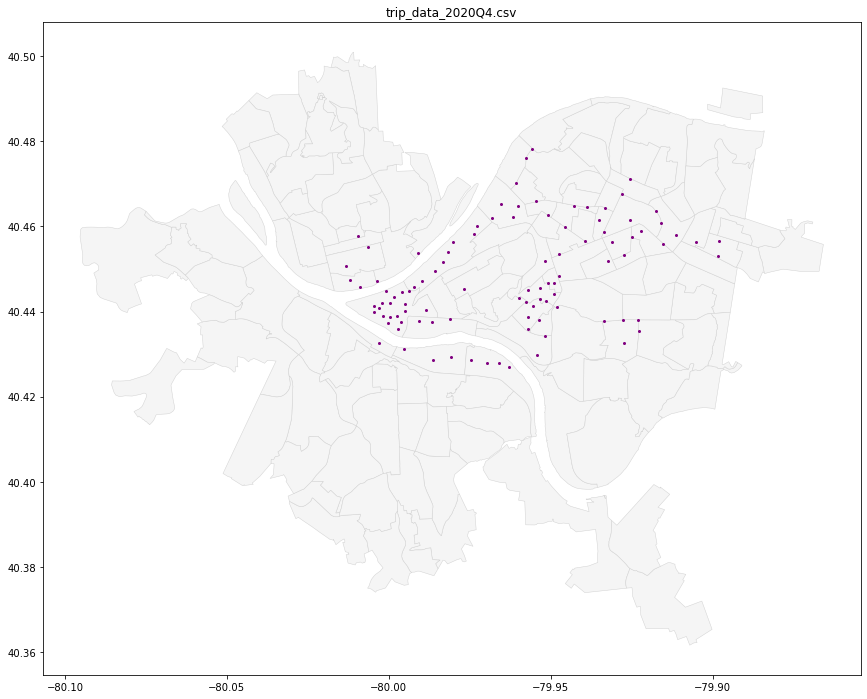

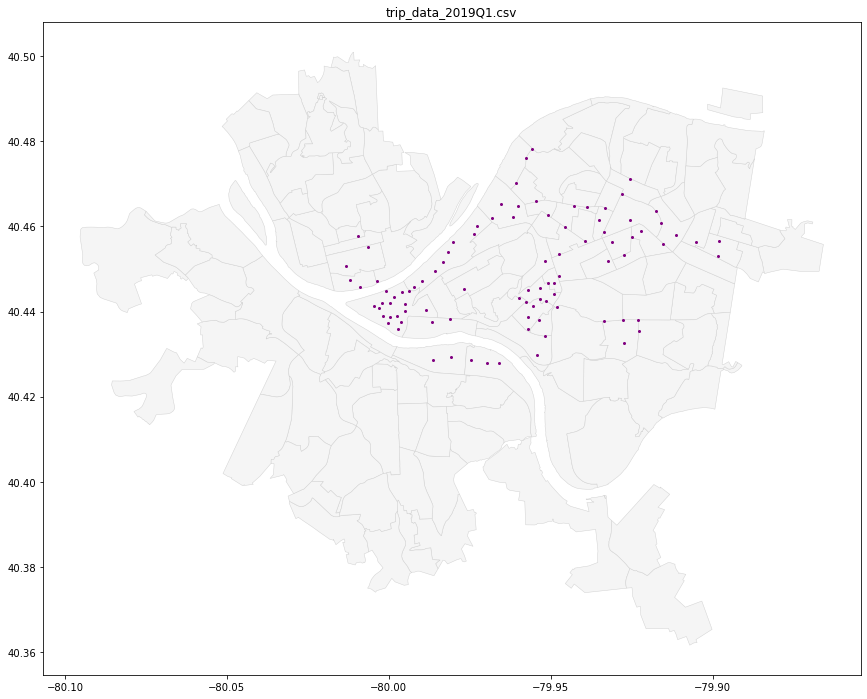

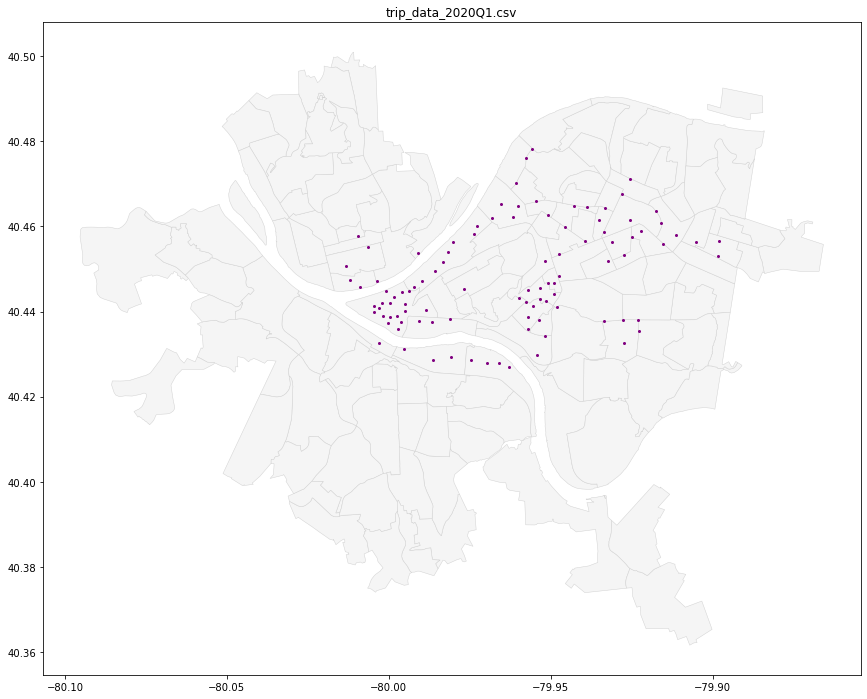

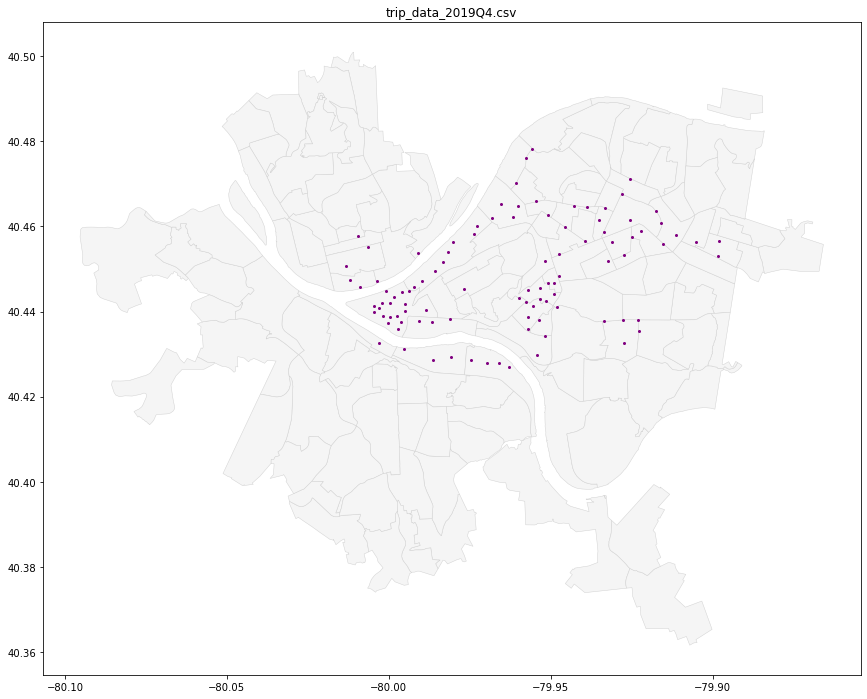

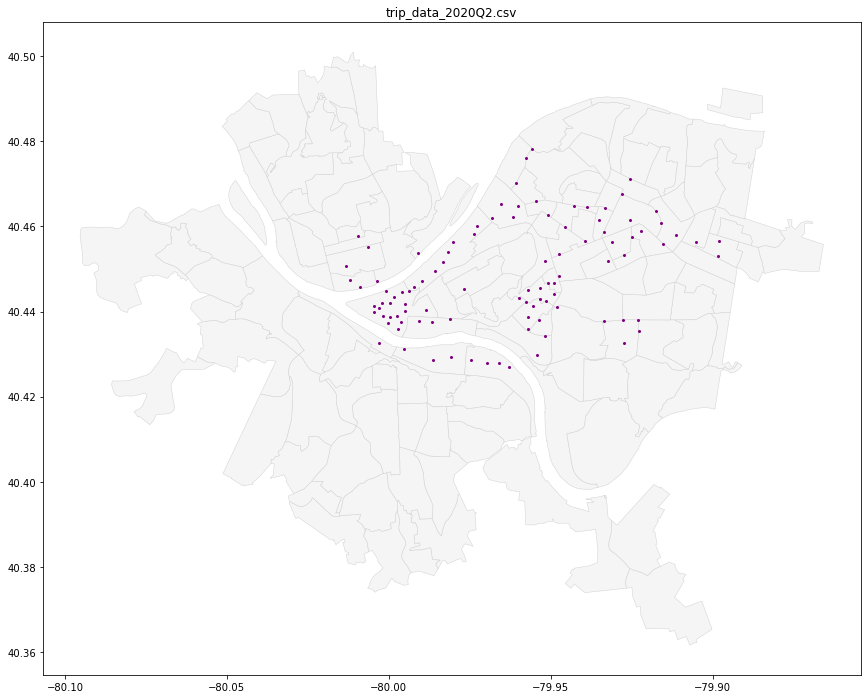

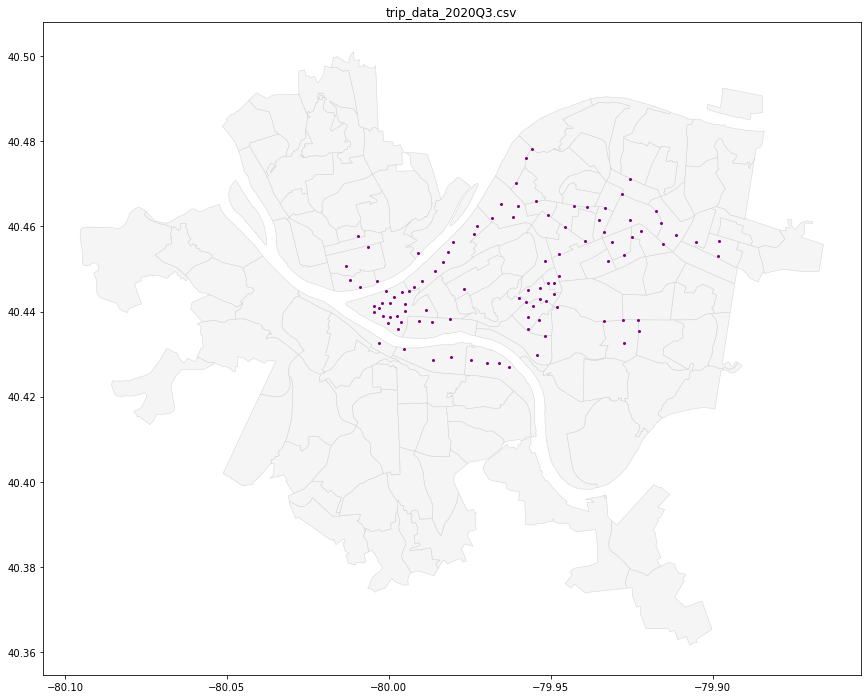

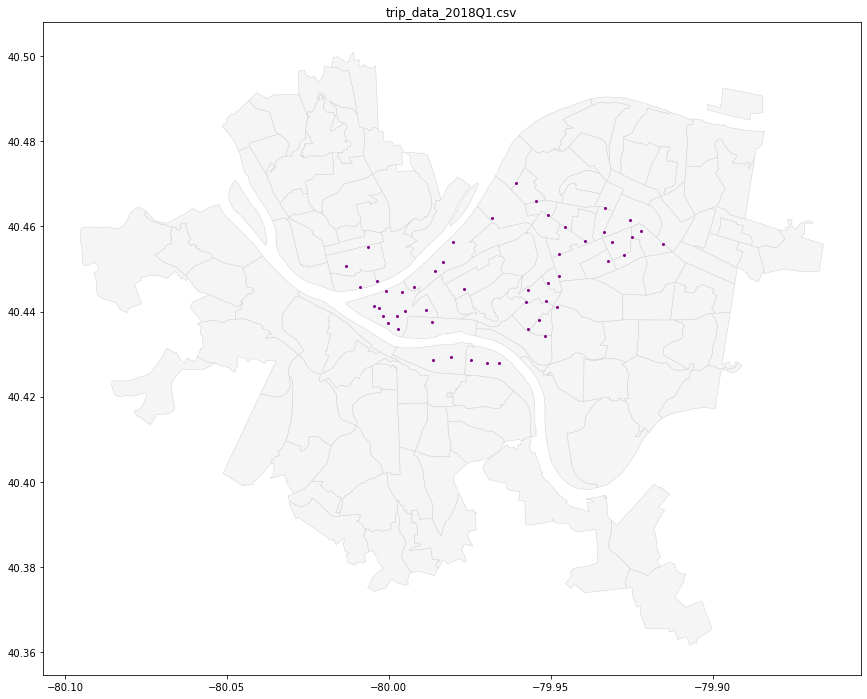

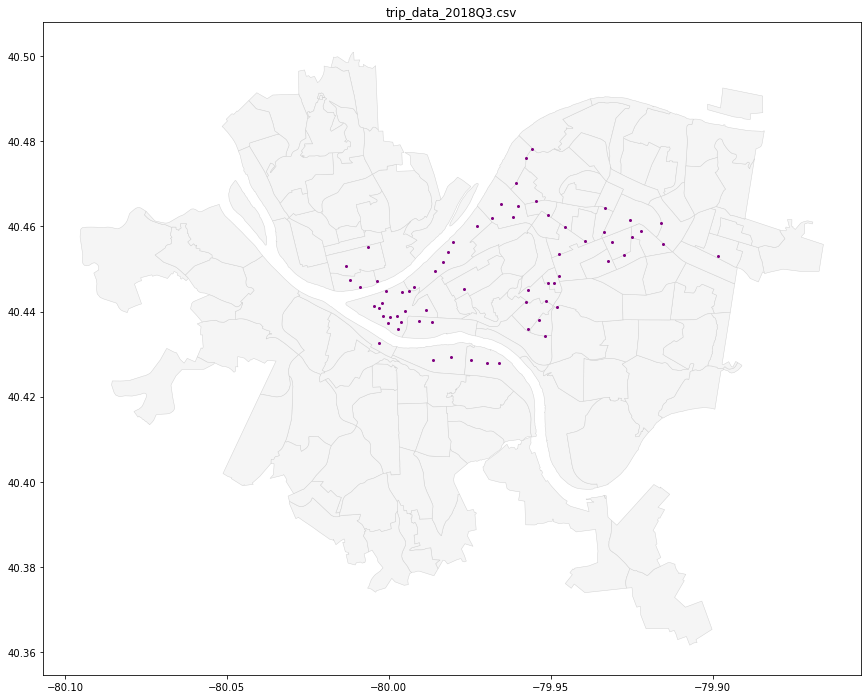

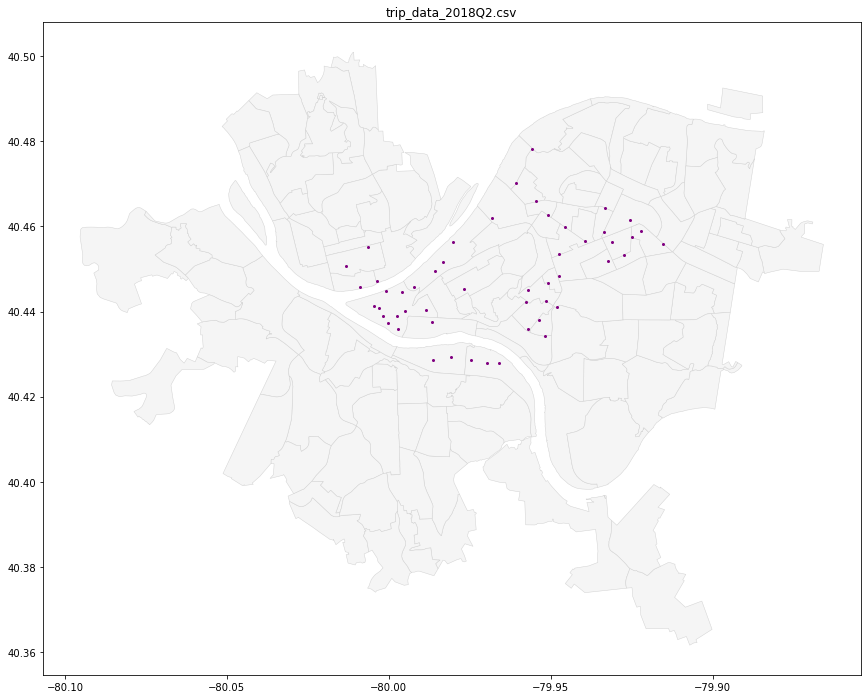

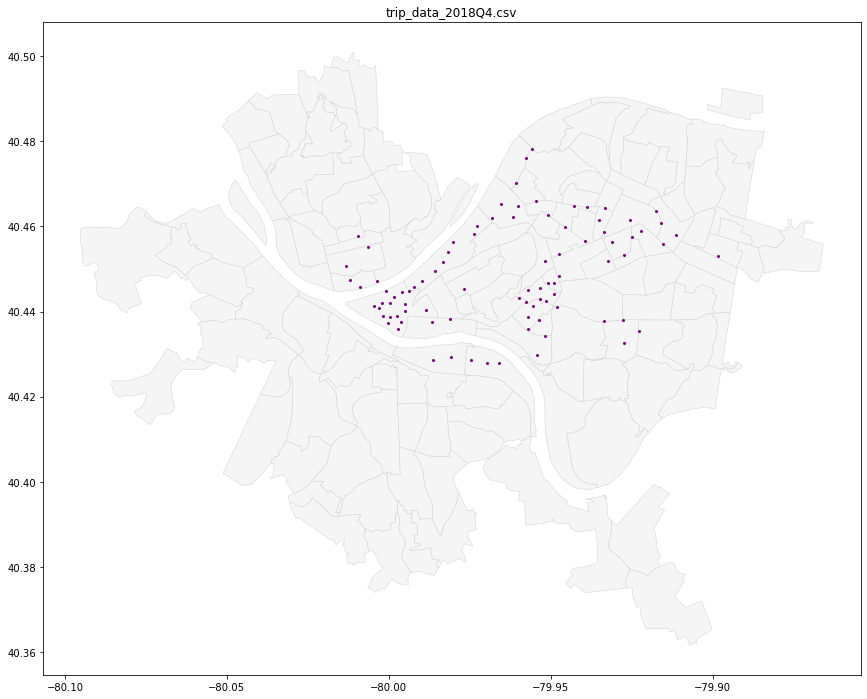

In [19]:
count = 0
for df in filtered_df:
    ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
    result = df.plot(ax=ax, color="Purple", markersize=4)
    plt.title(filenames[count])
    resultFig = result.get_figure()
    resultFig.savefig("../Results/stations_pgh/stations_" + filenames[count] + ".png")
    count+=1

In [20]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("../Results/stations_pgh/*.png")
imgs = sorted(imgs)

for i in imgs:
    print(i)
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('../Results/stations_pgh/stations_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=600, loop=5)

../Results/stations_pgh/stations_trip_data_2015Q2.csv.png
../Results/stations_pgh/stations_trip_data_2015Q3.csv.png
../Results/stations_pgh/stations_trip_data_2015Q4.csv.png
../Results/stations_pgh/stations_trip_data_2016Q1.csv.png
../Results/stations_pgh/stations_trip_data_2016Q2.csv.png
../Results/stations_pgh/stations_trip_data_2016Q3.csv.png
../Results/stations_pgh/stations_trip_data_2016Q4.csv.png
../Results/stations_pgh/stations_trip_data_2017Q1.csv.png
../Results/stations_pgh/stations_trip_data_2017Q2.csv.png
../Results/stations_pgh/stations_trip_data_2017Q3.csv.png
../Results/stations_pgh/stations_trip_data_2017Q4.csv.png
../Results/stations_pgh/stations_trip_data_2018Q1.csv.png
../Results/stations_pgh/stations_trip_data_2018Q2.csv.png
../Results/stations_pgh/stations_trip_data_2018Q3.csv.png
../Results/stations_pgh/stations_trip_data_2018Q4.csv.png
../Results/stations_pgh/stations_trip_data_2019Q1.csv.png
../Results/stations_pgh/stations_trip_data_2019Q2.csv.png
../Results/sta

![stationgif](../Results/stations_pgh/stations_gif.gif)

In [21]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("../Results/stations_pgh/*.png")
imgs = sorted(imgs)

start = imgs[0]
change2018 = imgs[12]
change2019 = imgs[14]
change20192 = imgs[15]
change2020 = imgs[21]

new_list = [start, change2018, change2019, change20192, change2020]

for i in new_list:
    print(i)
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('../Results/stations_pgh/stations_gif_compact.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500, loop=10)

../Results/stations_pgh/stations_trip_data_2015Q2.csv.png
../Results/stations_pgh/stations_trip_data_2018Q2.csv.png
../Results/stations_pgh/stations_trip_data_2018Q4.csv.png
../Results/stations_pgh/stations_trip_data_2019Q1.csv.png
../Results/stations_pgh/stations_trip_data_2020Q3.csv.png


![staitons2](../Results/stations_pgh/stations_gif_compact.gif)